<a href="https://colab.research.google.com/github/louisehviid/RD_data/blob/main/Benarbejde_til_CHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the conceptual framework?**


1.   Expected relationship between variables 
2.   Is there a cause-and-effect relationship (can we visualize it?)
3.   What other variables may impact this relationship?
*   Moderators (alter the effect that an independent variable has on a dependent variable)
*   Mediators (link the independent and dependent variables)
*   Control variables (held constant so that they don’t interfere)

Conceptual framework (1).svg

In [2]:
#Import libraries we need
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read data from the cloud
data1 = pd.read_excel('https://raw.githubusercontent.com/louisehviid/RD_data/main/Data/RD_DK.xlsx')


In [4]:
#get an overview
data1.head()

,Year,Reg_ialt,Region_Hovedstaden,Region_Sjælland,Region_Syddanmark,Region_Midtjylland,Region_Nordjylland
0,2008,34080,23756,1354,3665,4322,982
1,2009,36714,24848,1241,3982,5935,708
2,2010,35413,24148,1578,3407,5617,663
3,2011,36286,24458,1536,3434,6133,726
4,2012,37045,25036,1447,3746,6018,797


# Spørgsmål 1:
Hvad procentdel af investering i RD udgør nordjyske virksomheder?

In [5]:
#nordjylland relative to the rest of the country
subset_df = data1[['Reg_ialt', 'Region_Nordjylland', 'Year']]



In [6]:
#are all variables int64?
print(subset_df.dtypes)


Reg_ialt               int64
Region_Nordjylland    object
Year                   int64
dtype: object


In [9]:
#Transpose variables to int64
subset_df.loc['Region_Nordjylland'] = pd.to_numeric(subset_df['Region_Nordjylland'], errors='coerce')


<ipython-input-9-7d9b19e850ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc['Region_Nordjylland'] = pd.to_numeric(subset_df['Region_Nordjylland'], errors='coerce')


In [10]:
#check format has changed
print(subset_df.dtypes)


Reg_ialt              float64
Region_Nordjylland    float64
Year                  float64
dtype: object


In [11]:
#drop year without any values
df = subset_df.dropna(subset=['Region_Nordjylland'])

print(df)

    Reg_ialt  Region_Nordjylland    Year
0    34080.0               982.0  2008.0
1    36714.0               708.0  2009.0
2    35413.0               663.0  2010.0
3    36286.0               726.0  2011.0
4    37045.0               797.0  2012.0
5    36308.0               699.0  2013.0
6    36815.0               769.0  2014.0
7    39487.0               776.0  2015.0
8    42418.0              1244.0  2016.0
9    40757.0              1054.0  2017.0
11   41571.0               831.0  2019.0
12   42494.0               678.0  2020.0
13   44602.0              1041.0  2021.0


In [12]:
#Group variables by year
grouped_df = df.groupby('Year')

In [13]:
#Create new dataframe with percentage of RD in nordjylland
percentage_nordjylland = (grouped_df['Region_Nordjylland'].sum() / grouped_df['Reg_ialt'].sum() * 100)
print(percentage_nordjylland)

Year
2008.0    2.881455
2009.0    1.928420
2010.0    1.872194
2011.0    2.000772
2012.0    2.151437
2013.0    1.925196
2014.0    2.088822
2015.0    1.965204
2016.0    2.932717
2017.0    2.586059
2019.0    1.998990
2020.0    1.595519
2021.0    2.333976
dtype: float64


<ipython-input-23-ebfb4d417fc7>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


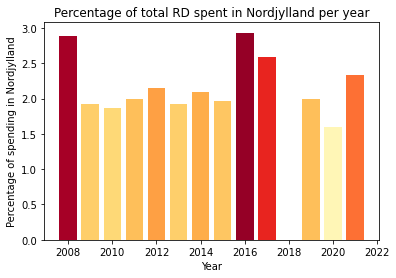

In [23]:
import matplotlib.cm as cm

#Create color map
cmap = cm.get_cmap('YlOrRd')

#Set vmin and vmax based on the range of percentage values
vmin = 1.5
vmax = 3

#Normalize the percentage values to the range [0, 1]
norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = cmap(norm(percentage_nordjylland.values))

bar_width = ['0.7', '0.7', '0.7']
plt.bar(x=percentage_nordjylland.index, height=percentage_nordjylland.values,  color=colors)
plt.title('Percentage of total RD spent in Nordjylland per year')
plt.xlabel('Year')
plt.ylabel('Percentage of spending in Nordjylland')
plt.show()

In [24]:
#add new column to dataframe
df1 = pd.DataFrame({'percentage nordjylland 2008-2021': percentage_nordjylland,

})

In [25]:
#Mean and std of percentage
df1.describe()

,percentage nordjylland 2008-2021
count,13.000000
mean,2.173905
std,0.401193
min,1.595519
25%,1.928420
50%,2.000772
75%,2.333976
max,2.932717


# Spørgsmål 2

Hvad procentdel af investering i RD udgør nordjyske virksomheder relativ til virksomheder i andre regioner?

In [75]:
#Plot nordjylland relative to other regions across the country
subset_df2 = data1.drop('Reg_ialt', axis=1)
print(subset_df2)

    Year Region_Hovedstaden Region_Sjælland Region_Syddanmark  \
0   2008              23756            1354              3665   
1   2009              24848            1241              3982   
2   2010              24148            1578              3407   
3   2011              24458            1536              3434   
4   2012              25036            1447              3746   
5   2013              24398            1266              4118   
6   2014              25010             968              4260   
7   2015              27020             972              4790   
8   2016              29095            1073              4601   
9   2017              27865            1615              3416   
10  2018                 ..              ..                ..   
11  2019              28270            1539              4210   
12  2020              29304            1481              4475   
13  2021              30621            1634              4814   

   Region_Midtjylland Re

In [ ]:
#Removing year 2018 w/o values 

df = subset_df2.drop(subset_df2[subset_df2['Year'] == 2018].index).copy()

print(df)


    Year Region_Hovedstaden Region_Sjælland Region_Syddanmark  \
0   2008              23756            1354              3665   
1   2009              24848            1241              3982   
2   2010              24148            1578              3407   
3   2011              24458            1536              3434   
4   2012              25036            1447              3746   
5   2013              24398            1266              4118   
6   2014              25010             968              4260   
7   2015              27020             972              4790   
8   2016              29095            1073              4601   
9   2017              27865            1615              3416   
11  2019              28270            1539              4210   
12  2020              29304            1481              4475   
13  2021              30621            1634              4814   

   Region_Midtjylland Region_Nordjylland  
0                4322                982  
1  

In [ ]:
#Transpose variables to int64
# Convert all columns to int64
df = df.astype('int64', errors='ignore')


In [ ]:
#are all variables int64?
print(df.dtypes)
print(df)


Year                  int64
Region_Hovedstaden    int64
Region_Sjælland       int64
Region_Syddanmark     int64
Region_Midtjylland    int64
Region_Nordjylland    int64
dtype: object
    Year  Region_Hovedstaden  Region_Sjælland  Region_Syddanmark  \
0   2008               23756             1354               3665   
1   2009               24848             1241               3982   
2   2010               24148             1578               3407   
3   2011               24458             1536               3434   
4   2012               25036             1447               3746   
5   2013               24398             1266               4118   
6   2014               25010              968               4260   
7   2015               27020              972               4790   
8   2016               29095             1073               4601   
9   2017               27865             1615               3416   
11  2019               28270             1539               4210   
12

In [ ]:
#calculate percentage for each region per year
grouped_df = df.groupby('Year')
print(grouped_df)

In [ ]:
import plotly.graph_objs as go
import seaborn as sns

# Calculate the percentage of RD for each region for each year
percent_df = grouped_df.apply(lambda x: x.iloc[:,1:].div(x.iloc[:,1:].sum(axis=1), axis=0) * 100)

# Create a stacked bar chart
flavors = ['Region_Hovedstaden', 'Region_Sjælland', 'Region_Syddanmark', 'Region_Midtjylland', 'Region_Nordjylland']
#colors = ['brown', 'red', 'yellow', 'green', 'blue']
palette = 'plasma_r'
colors = sns.color_palette(palette=palette, n_colors=len(flavors)).as_hex()


data = []
for i in range(len(flavors)):
    trace = go.Bar(x=percent_df.index, y=percent_df[flavors[i]], name=flavors[i],
                   marker=dict(color=colors[i]))
    data.append(trace)

layout = go.Layout(title='Percentage of RD by Region',
                   barmode='stack',
                   xaxis=dict(title='Year', tickmode='linear', dtick=1))
fig = go.Figure(data=data, layout=layout)
fig.show()

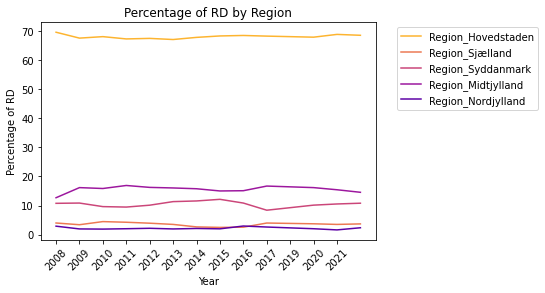

In [ ]:
# Calculate the percentage of RD for each region for each year
percent_df = grouped_df.apply(lambda x: x.iloc[:,1:].div(x.iloc[:,1:].sum(axis=1), axis=0) * 100)

# Plot the results
#colors = ['brown', 'red', 'yellow', 'purple', 'blue']
flavors = ['Region_Hovedstaden', 'Region_Sjælland', 'Region_Syddanmark', 'Region_Midtjylland', 'Region_Nordjylland']
palette = 'plasma_r'
colors = sns.color_palette(palette=palette, n_colors=len(flavors)).as_hex()

for i, flavor in enumerate(flavors):
    plt.plot(percent_df.index, percent_df[flavor], label=flavor, color=colors[i])

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of RD')
plt.title('Percentage of RD by Region')

# Set the x-axis ticks and labels
years = grouped_df['Year'].unique()

# Convert the year labels to strings without square brackets
year_labels = [str(year)[1:-1] for year in grouped_df['Year'].unique()]

# Set the x-axis ticks and labels
plt.xticks(range(len(year_labels)), year_labels, rotation=45)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Spørgsmål 3

Hvordan ser dette ud i en international/Europæisk context?

Det kan vi ikke finde data til at svare på. Det vi har er hvor mange procent virksomheder i hvert land bidrager til den 'nationale' investering in R&D. Da vi ikke kender hvert lands samlede investering er det svært at sammenligne med dk.

Hvor stor en percentdel af RD kommer fra industrien i hvert land relativ til andre interne 'contributers'?

In [ ]:
#Read data from the cloud
#data2 = pd.read_csv('https://raw.githubusercontent.com/louisehviid/RD_data/main/Data/Gross_domestic_RnD.csv')

#Spørgsmål 4

Kan vi sige noget om antallet af erhvervs-PhD’ere i Nordjylland contra resten af Danmark?

Innovationsfondens opgørelse er det eneste data vi kunne finde.

https://innovationsfonden.dk/sites/default/files/2020-02/erhvervs-ph.d._statistik_2002-2019.pdf


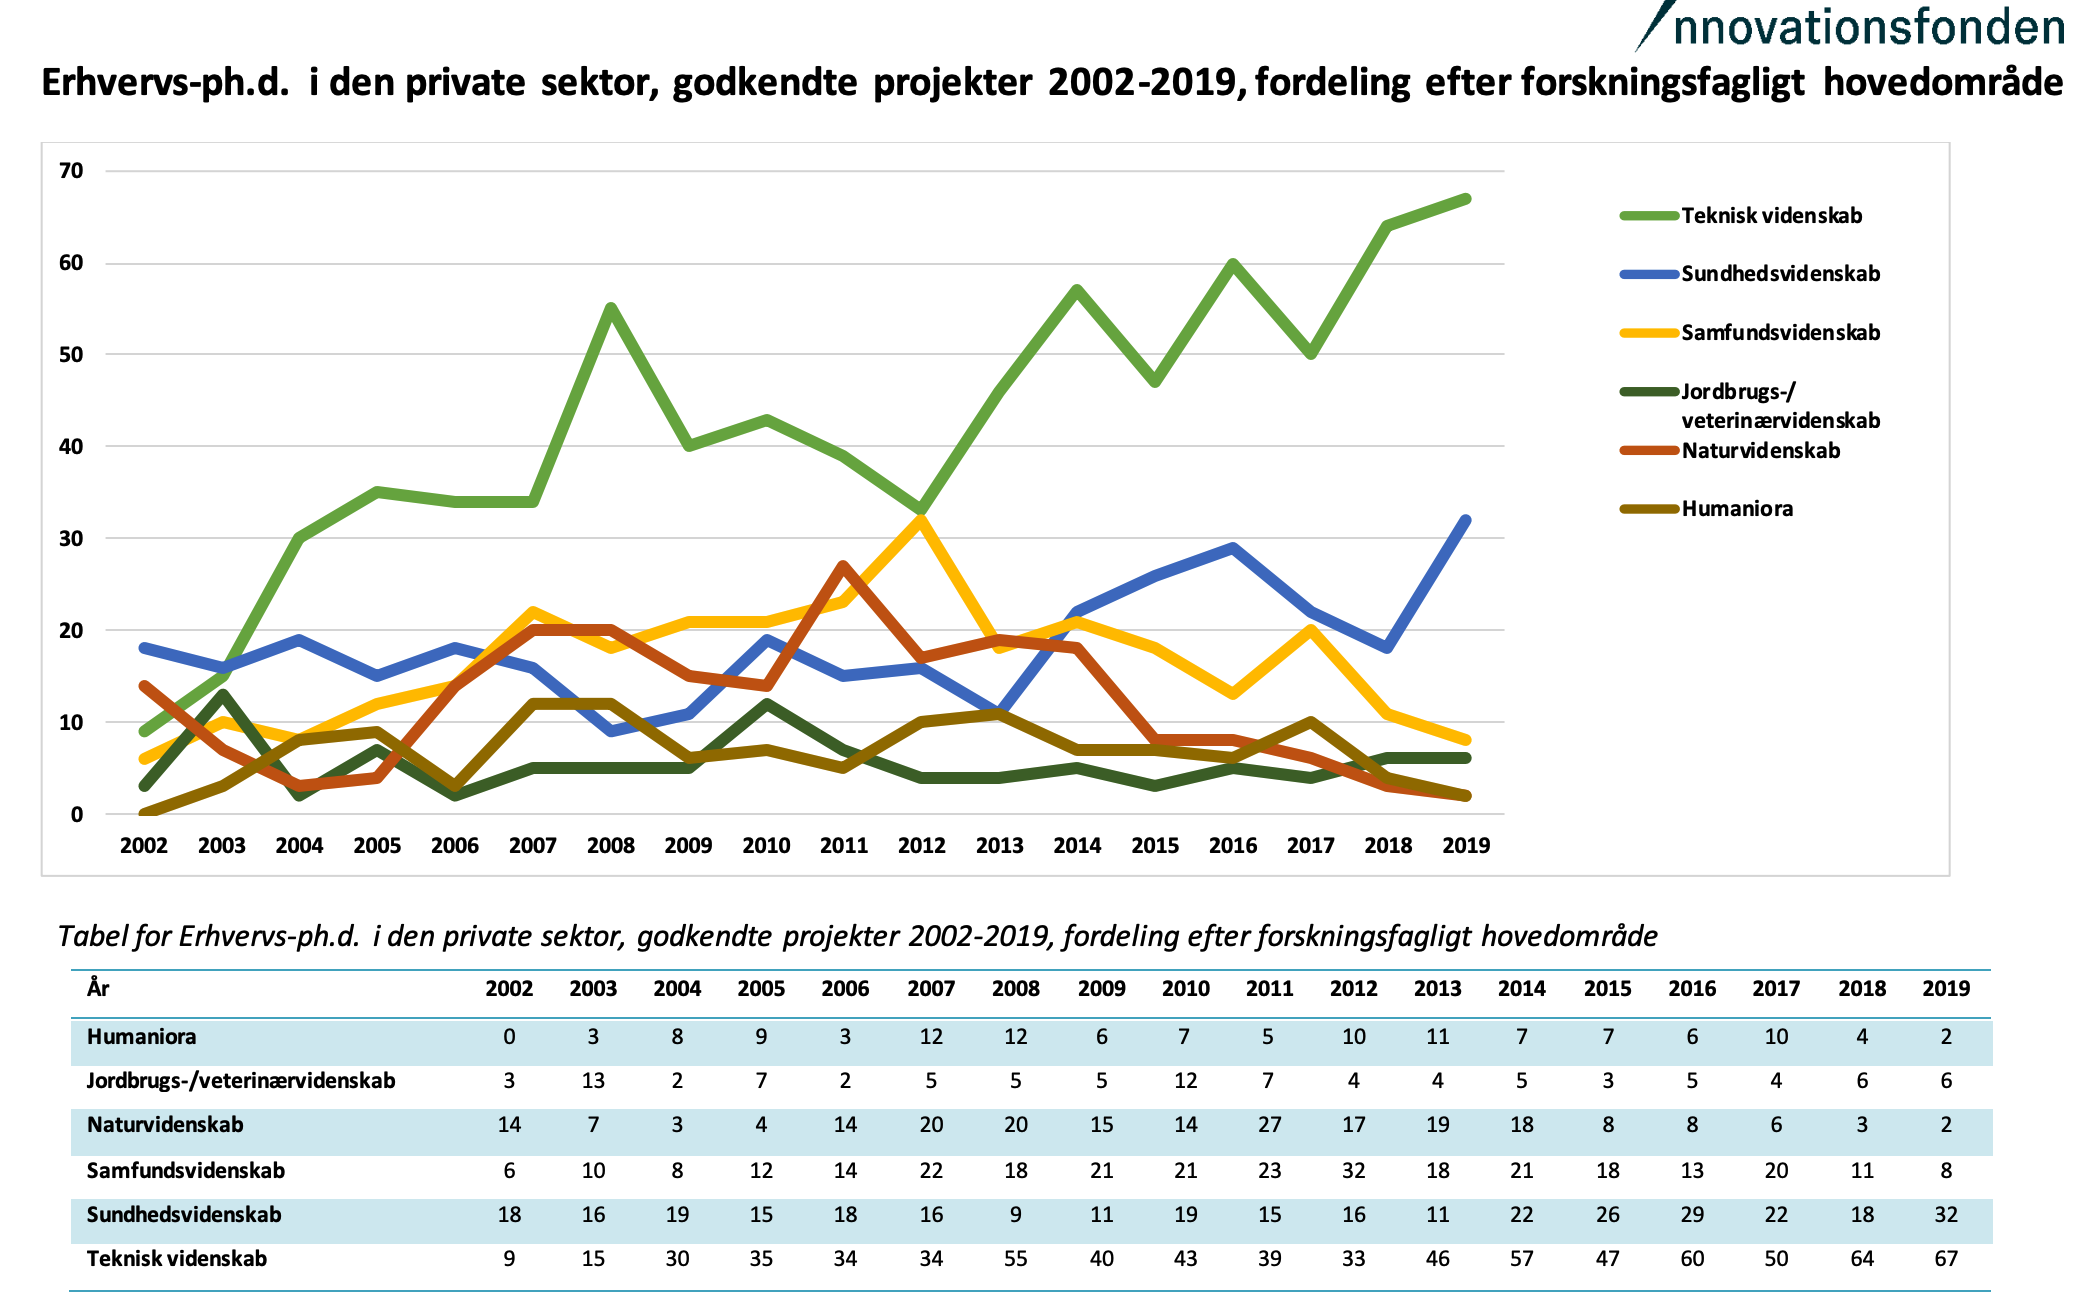

# Spørgsmål 5

Antallet af PhD studerende regionalt og hvor mange der har en ph.d. indenfor de forskellige hovedretninger



tilgang-af-studerende-ph.svg

tilgang-af-studerende-ph (1).svg

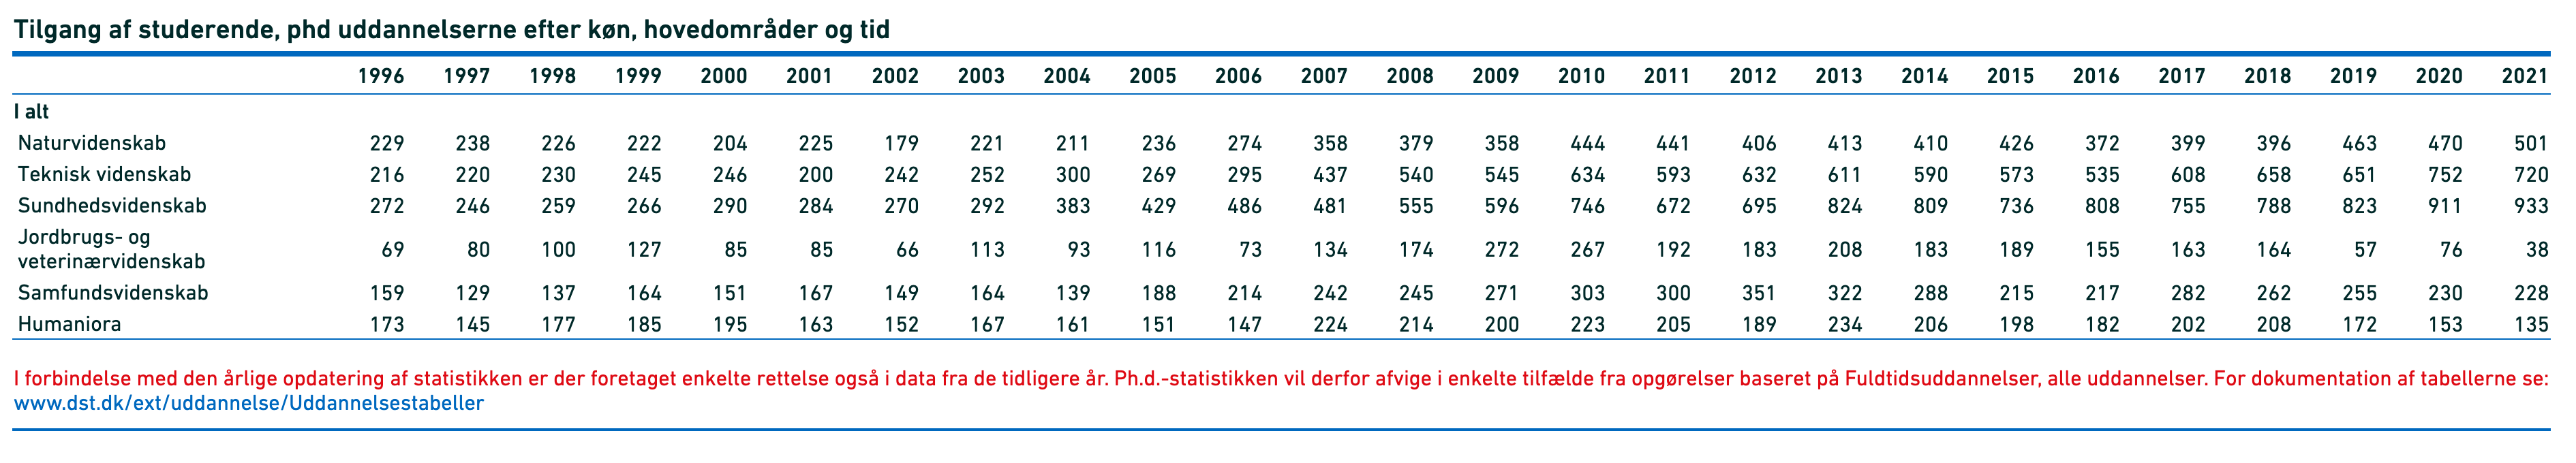

Er det tilgang til phd'er eller tildelte phd'er, der er vigtig?

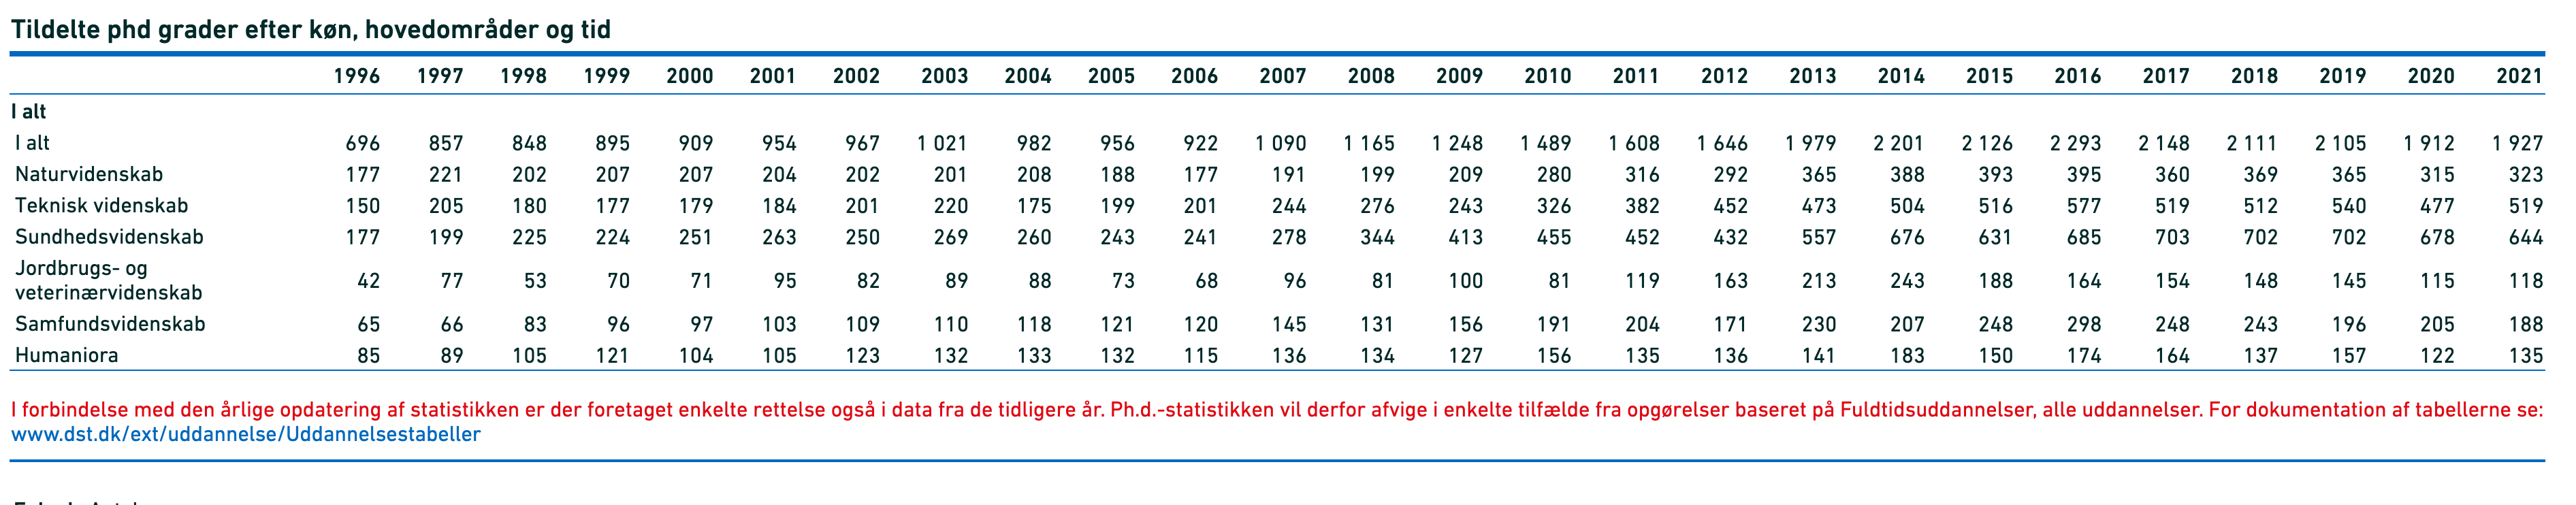

# Spørgsmål 6
Phd's regionale tilknytning under uddannelse ved respektive universiteter (tilgang og fuldført)?

universiteter (5).svg

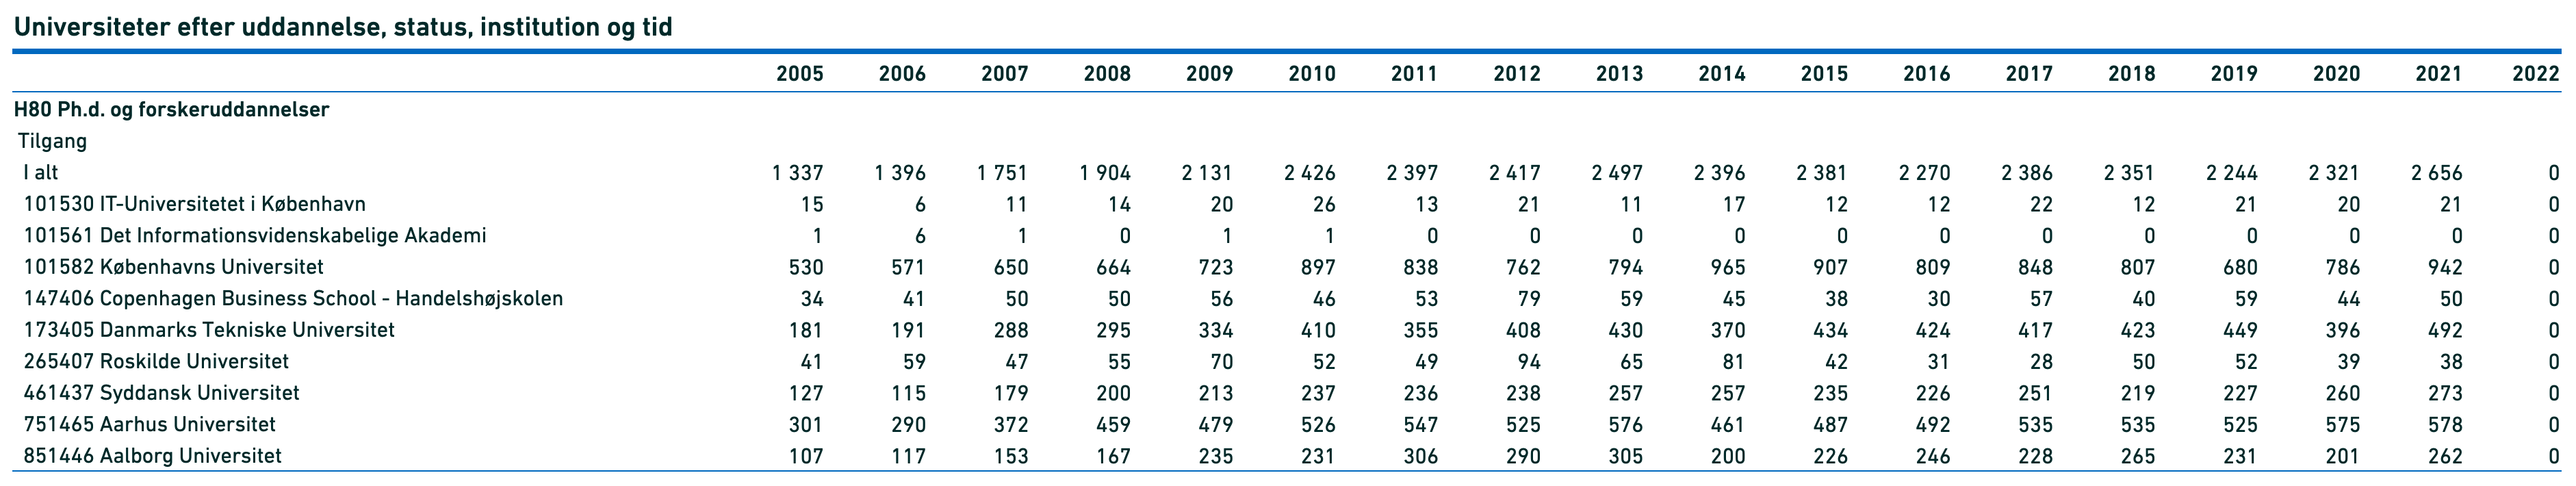

universiteter (4).svg

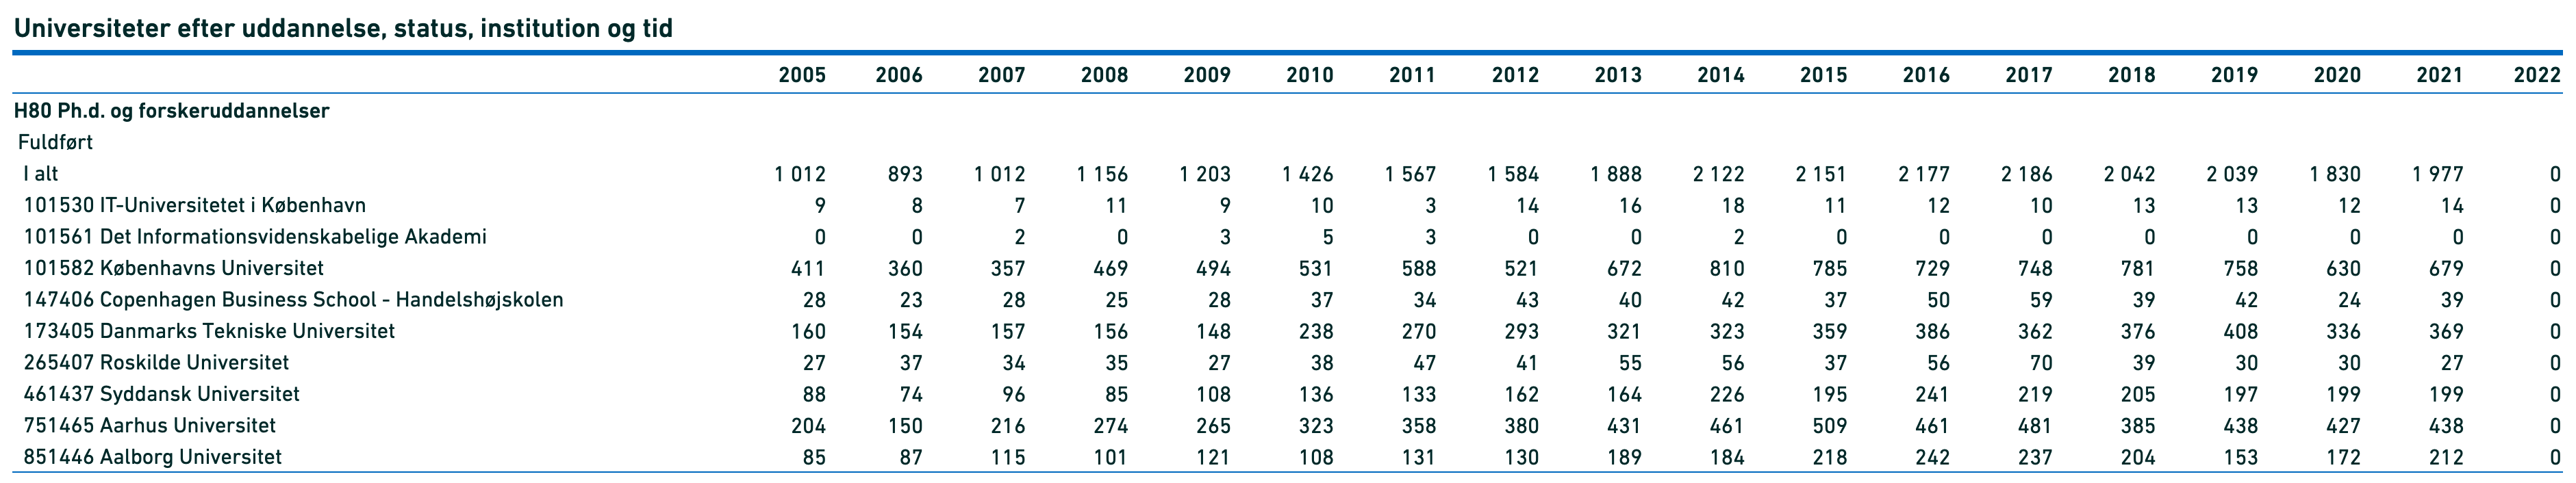

# Spørgsmål 6a

Den regionale tilknytning af Phd'er efter færdiggjort uddannelse

befolkningens-hjest-fuld.svg

befolkningens-hjest-fuld (1).svg

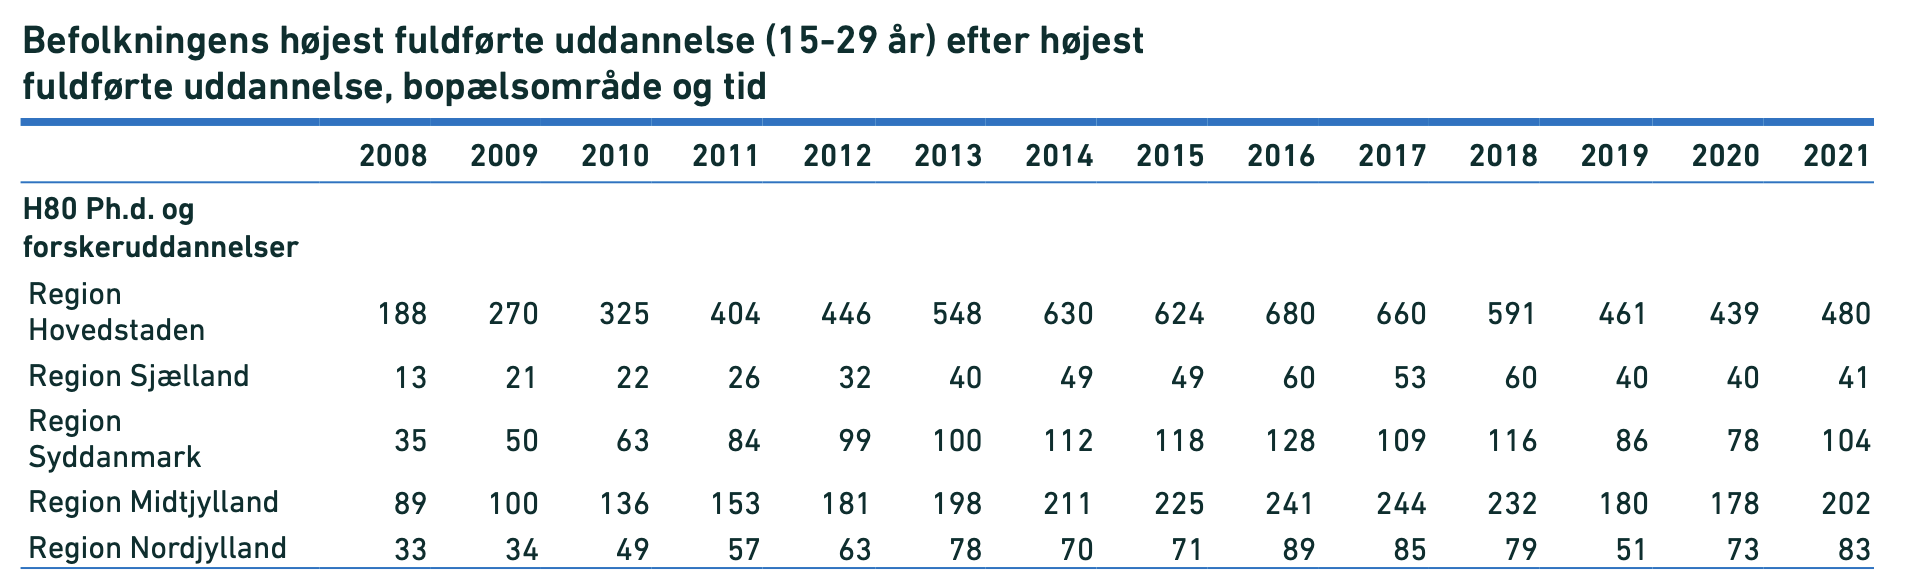